<a href="https://colab.research.google.com/github/abdullahmusawar98-design/EMAIL-CLASSIFIER/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload your file first
from google.colab import files
uploaded = files.upload()

Saving emails.csv.csv to emails.csv.csv


In [ ]:
# ===== Linear Regression used for Classification (threshold at 0.5) =====

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)

# ---- Load data ----
# If you uploaded the file to Colab, it will be in /content/
df = pd.read_csv("emails.csv.csv")

# ---- Features / Target ----
y = df["Prediction"].astype(int)
X = df.drop(columns=["Prediction"])

# Drop ID column if present
if "Email No." in X.columns:
    X = X.drop(columns=["Email No."])

# ---- Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Train Linear Regression ----
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# ---- Predict (continuous) ----
y_score = lin_reg.predict(X_test)  # can be outside [0,1]

# Convert to class using threshold
threshold = 0.5
y_pred = (y_score >= threshold).astype(int)

# ---- Metrics ----
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# ROC-AUC needs a "score" where larger means more likely class 1
# y_score works fine for that:
print("ROC-AUC  :", roc_auc_score(y_test, y_score))


Accuracy : 0.7816425120772947
Precision: 0.6045197740112994
Recall   : 0.7133333333333334
F1-score : 0.654434250764526

Confusion Matrix:
 [[595 140]
 [ 86 214]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       735
           1       0.60      0.71      0.65       300

    accuracy                           0.78      1035
   macro avg       0.74      0.76      0.75      1035
weighted avg       0.80      0.78      0.79      1035

ROC-AUC  : 0.7629070294784581


In [ ]:
# ===== Logistic Regression Classifier =====

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)

# ---- Load data ----
df = pd.read_csv("emails.csv.csv")

# ---- Features / Target ----
y = df["Prediction"].astype(int)
X = df.drop(columns=["Prediction"])

# Drop ID column if present
if "Email No." in X.columns:
    X = X.drop(columns=["Email No."])

# ---- Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Pipeline: scaling + logistic regression ----
# with_mean=False is important for sparse-like/count data (safe even if dense)
model = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("clf", LogisticRegression(max_iter=2000, solver="liblinear"))
])

model.fit(X_train, y_train)

# ---- Predict ----
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ---- Metrics ----
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))


Accuracy : 0.9719806763285024
Precision: 0.9385113268608414
Recall   : 0.9666666666666667
F1-score : 0.9523809523809523

Confusion Matrix:
 [[716  19]
 [ 10 290]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       735
           1       0.94      0.97      0.95       300

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035

ROC-AUC  : 0.987235827664399


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 51.7 MB/s eta 0:00:00


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 3000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       768,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 812,961 (3.10 MB)

 Trainable params: 812,001 (3.10 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.6932 - auc: 0.6455 - loss: 0.6072 - precision: 0.4631 - recall: 0.3464 - val_accuracy: 0.9407 - val_auc: 0.9802 - val_loss: 0.3508 - val_precision: 0.8429 - val_recall: 0.9778 - learning_rate: 0.0010
Epoch 2/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9195 - auc: 0.9657 - loss: 0.2912 - precision: 0.8474 - recall: 0.8699 - val_accuracy: 0.9072 - val_auc: 0.9898 - val_loss: 0.2424 - val_precision: 0.7647 - val_recall: 0.9822 - learning_rate: 0.0010
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9614 - auc: 0.9911 - loss: 0.1508 - precision: 0.9346 - recall: 0.9374 - val_accuracy: 0.9729 - val_auc: 0.9943 - val_loss: 0.1036 - val_precision: 0.9286 - val_recall: 0.9822 - learning_rate: 0.0010
Epoch 4/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9675 - auc: 0.9937 - loss: 0.1080 - precision: 0.9402 - recall: 0.9507 - val_accuracy: 0.9446 - val_auc: 0.9964 - val_loss: 0.1300 - val_pre

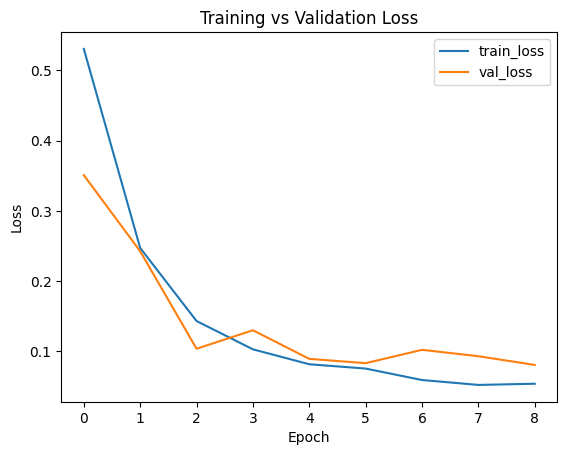

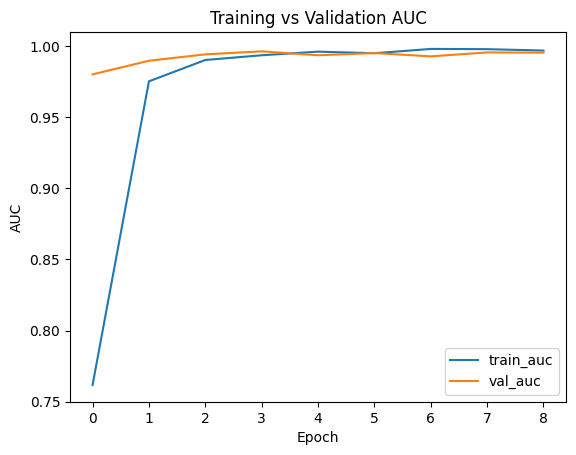

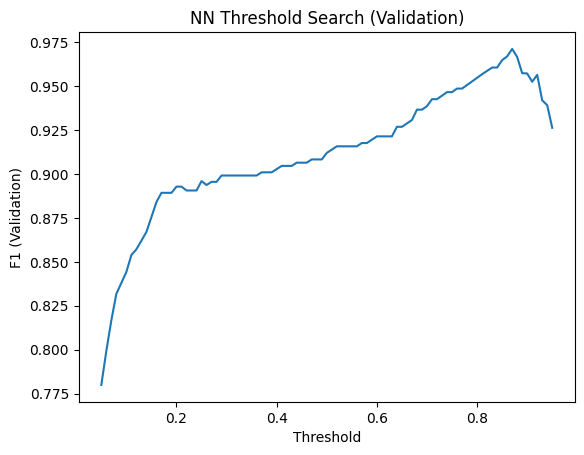

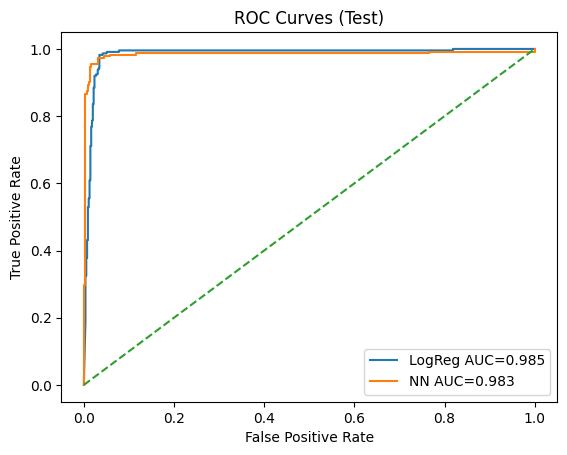

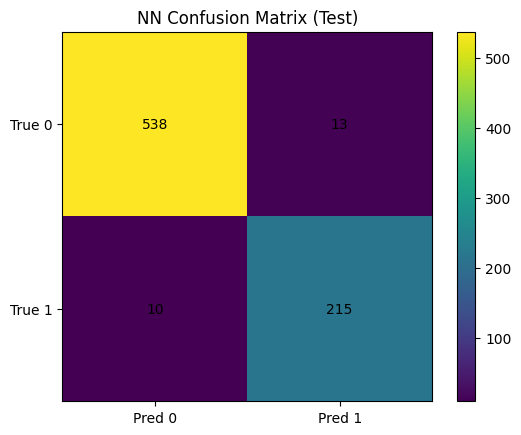


Saved files: email_nn_model.keras, scaler.joblib, best_threshold.txt


In [ ]:
# ============================================================
# Deep Learning + Evaluation & Comparison (Colab-ready)
# - TensorFlow NN (3–5 layers) with Dropout + BatchNorm
# - Proper training loop w/ validation
# - LR scheduling + Early stopping
# - Multiple metrics (Acc/Prec/Recall/F1/ROC-AUC)
# - Statistical significance test (McNemar) vs Logistic Regression
# - Visualizations (learning curves, ROC, confusion matrix, threshold-F1)
# ============================================================

!pip -q install -U scikit-learn statsmodels joblib

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from statsmodels.stats.contingency_tables import mcnemar

# ----------------------------
# 1) Load data
# ----------------------------
df = pd.read_csv("emails.csv.csv")

y = df["Prediction"].astype(int).values
X = df.drop(columns=["Prediction"]).copy()

# Drop ID column if present
if "Email No." in X.columns:
    X.drop(columns=["Email No."], inplace=True)

X = X.values.astype(np.float32)

# ----------------------------
# 2) Train/Val/Test split
# ----------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# ----------------------------
# 3) Scaling (important for NN + Logistic)
# ----------------------------
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

joblib.dump(scaler, "scaler.joblib")

# ----------------------------
# 4) Baseline model for comparison: Logistic Regression
# ----------------------------
logreg = LogisticRegression(max_iter=3000, solver="liblinear")
logreg.fit(X_train_s, y_train)

log_proba = logreg.predict_proba(X_test_s)[:, 1]
log_pred  = (log_proba >= 0.5).astype(int)

# ----------------------------
# 5) Deep Learning Model (3–5 hidden layers) w/ Dropout + BatchNorm
# ----------------------------
NUM_HIDDEN_LAYERS = 4   # choose 3, 4, or 5
UNITS = [256, 128, 64, 32, 16]   # uses first NUM_HIDDEN_LAYERS
DROPOUT = 0.3
LR = 1e-3

def build_nn(input_dim: int, num_hidden_layers: int):
    assert 3 <= num_hidden_layers <= 5

    inputs = keras.Input(shape=(input_dim,))
    x = inputs

    # Hidden layers: Dense -> BatchNorm -> ReLU -> Dropout
    for i in range(num_hidden_layers):
        x = layers.Dense(UNITS[i], use_bias=False)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        x = layers.Dropout(DROPOUT)(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs, outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LR),
        loss="binary_crossentropy",
        metrics=[
            "accuracy",
            keras.metrics.AUC(name="auc"),
            keras.metrics.Precision(name="precision"),
            keras.metrics.Recall(name="recall"),
        ],
    )
    return model

nn = build_nn(X_train_s.shape[1], NUM_HIDDEN_LAYERS)
nn.summary()

# LR scheduling + Early stopping
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_auc", mode="max", patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_auc", mode="max", factor=0.5, patience=2, min_lr=1e-6),
]

history = nn.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=40,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

# ----------------------------
# 6) Pick best threshold on VAL for NN (maximize F1)
# ----------------------------
val_proba = nn.predict(X_val_s).ravel()

thresholds = np.linspace(0.05, 0.95, 91)
f1s = []
for t in thresholds:
    f1s.append(f1_score(y_val, (val_proba >= t).astype(int), zero_division=0))

best_idx = int(np.argmax(f1s))
best_t = float(thresholds[best_idx])
print(f"\nBest NN threshold (VAL) for F1: {best_t:.2f} | VAL F1: {f1s[best_idx]:.4f}")

# ----------------------------
# 7) Evaluate both models on TEST
# ----------------------------
nn_proba = nn.predict(X_test_s).ravel()
nn_pred  = (nn_proba >= best_t).astype(int)

def report(name, y_true, y_pred, y_score):
    print(f"\n===== {name} =====")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall   :", recall_score(y_true, y_pred, zero_division=0))
    print("F1-score :", f1_score(y_true, y_pred, zero_division=0))
    print("ROC-AUC  :", roc_auc_score(y_true, y_score))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nReport:\n", classification_report(y_true, y_pred, zero_division=0))

report("Logistic Regression (0.5 threshold)", y_test, log_pred, log_proba)
report(f"Neural Network (threshold={best_t:.2f})", y_test, nn_pred, nn_proba)

# ----------------------------
# 8) Statistical significance test: McNemar (paired TEST predictions)
#     H0: both models have same error rate
# ----------------------------
# Contingency table:
#   b = log correct, nn wrong
#   c = log wrong, nn correct
b = np.sum((log_pred == y_test) & (nn_pred != y_test))
c = np.sum((log_pred != y_test) & (nn_pred == y_test))
table = [[0, b],
         [c, 0]]

# exact=True is safer for smaller b+c
result = mcnemar(table, exact=True)
print("\n===== McNemar Test (LogReg vs NN) =====")
print(f"b (LogReg correct, NN wrong) = {b}")
print(f"c (LogReg wrong, NN correct) = {c}")
print("p-value =", result.pvalue)
if result.pvalue < 0.05:
    print("Conclusion: difference is statistically significant (p < 0.05).")
else:
    print("Conclusion: not statistically significant (p >= 0.05).")

# ----------------------------
# 9) Visualizations
# ----------------------------

# (A) Learning curves
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

plt.figure()
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.title("Training vs Validation AUC")
plt.show()

# (B) Threshold vs F1 (validation)
plt.figure()
plt.plot(thresholds, f1s)
plt.xlabel("Threshold")
plt.ylabel("F1 (Validation)")
plt.title("NN Threshold Search (Validation)")
plt.show()

# (C) ROC curves (test)
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
fpr_nn,  tpr_nn,  _ = roc_curve(y_test, nn_proba)

plt.figure()
plt.plot(fpr_log, tpr_log, label=f"LogReg AUC={roc_auc_score(y_test, log_proba):.3f}")
plt.plot(fpr_nn,  tpr_nn,  label=f"NN AUC={roc_auc_score(y_test, nn_proba):.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Test)")
plt.legend()
plt.show()

# (D) Confusion matrix for NN (simple heatmap using matplotlib)
cm = confusion_matrix(y_test, nn_pred)
plt.figure()
plt.imshow(cm)
plt.title("NN Confusion Matrix (Test)")
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["True 0", "True 1"])
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.colorbar()
plt.show()

# ----------------------------
# 10) Save model + threshold
# ----------------------------
nn.save("email_nn_model.keras")
with open("best_threshold.txt", "w") as f:
    f.write(str(best_t))

print("\nSaved files: email_nn_model.keras, scaler.joblib, best_threshold.txt")


In [ ]:
# Upload your file first
from google.colab import files
uploaded = files.upload()

Saving emails.csv.csv to emails.csv (1).csv
